First few rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4    

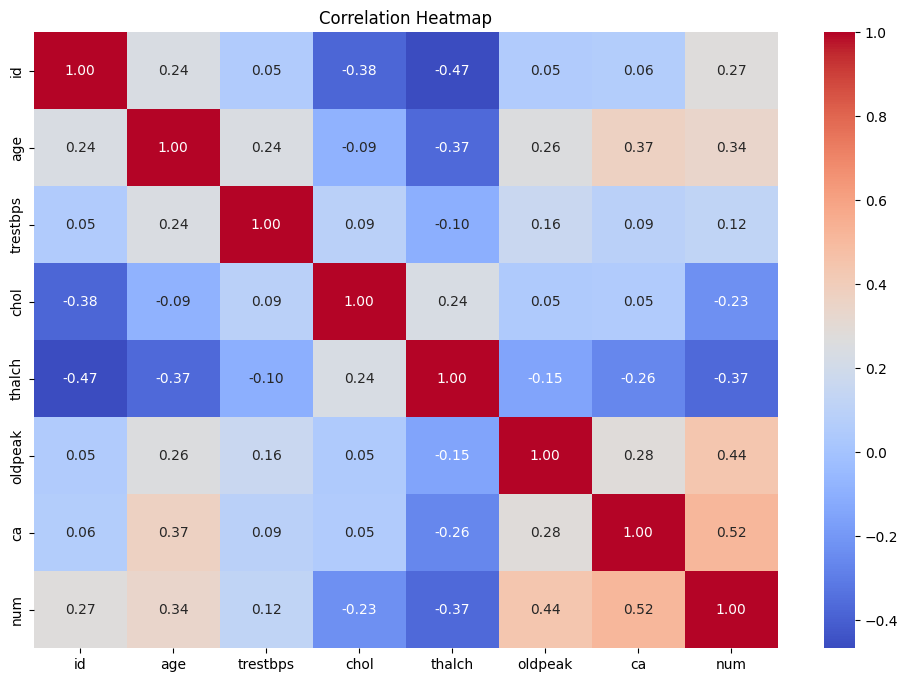


Available columns in the dataset:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Column 'target' not found in the dataset.
Skipping pairplot due to missing target column 'None'.
Skipping distribution plot due to missing target column 'None'.


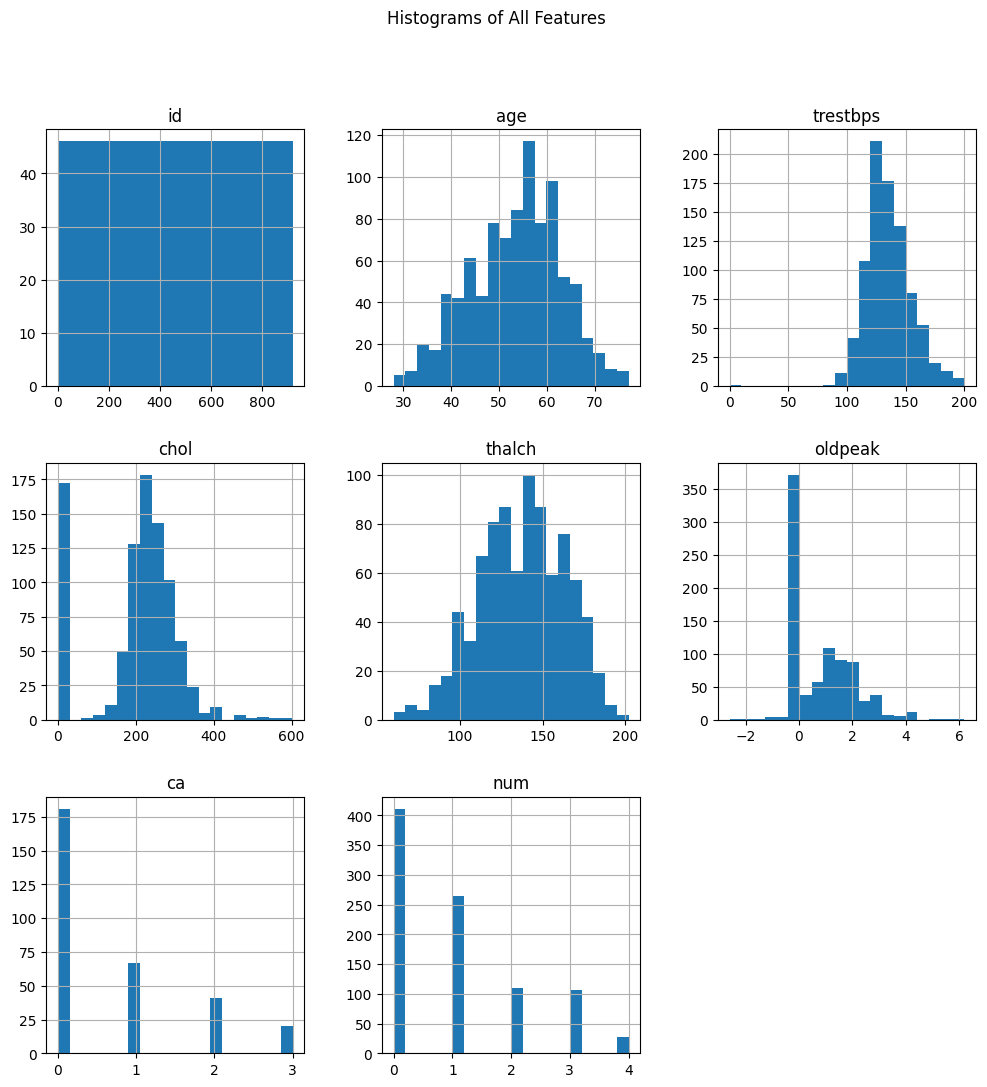

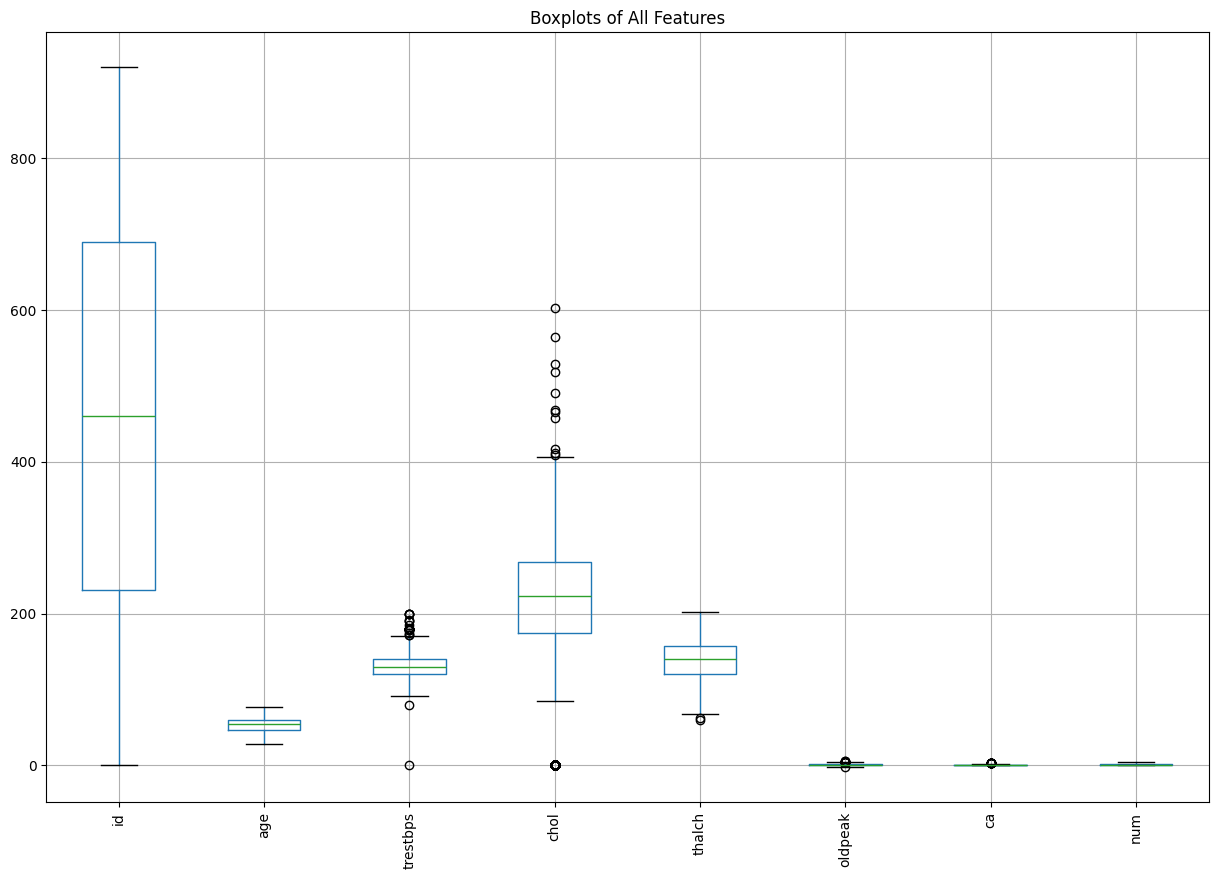

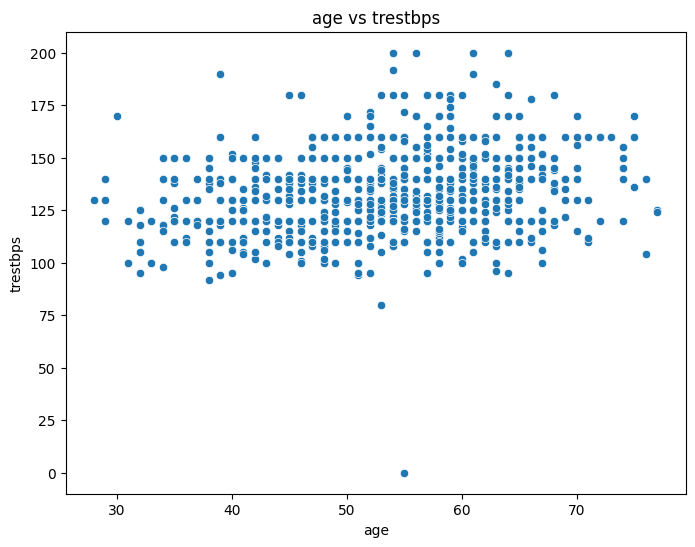

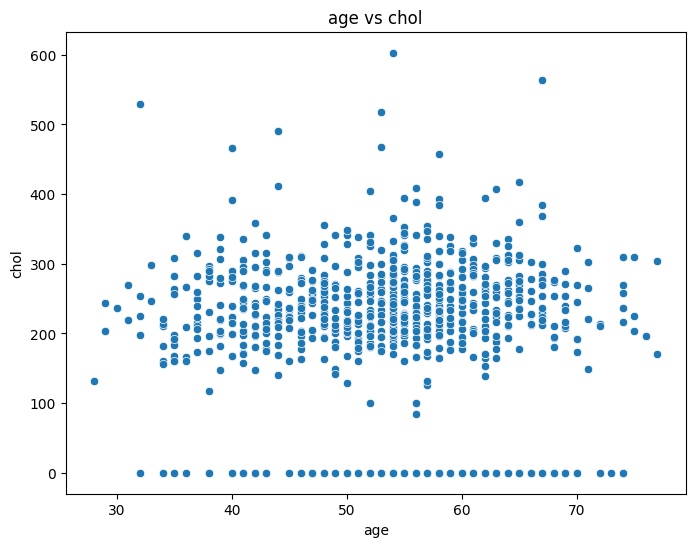

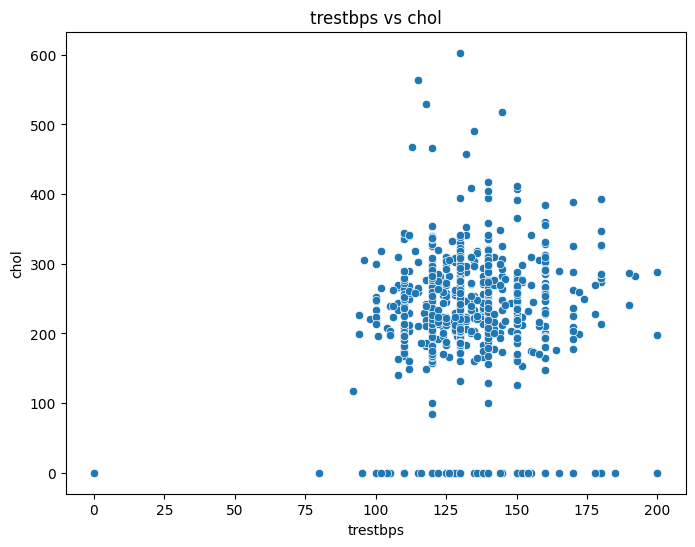

One or both columns 'thalach' and 'oldpeak' not found in the dataset.
Skipping additional analysis due to missing target column 'None'.

Processed data saved to: C:\Users\User\Downloads\archive\processed_heart_disease.csv


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\User\Downloads\archive\heart_disease_uci.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get a summary of the dataset
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Data visualization using Seaborn and Matplotlib

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Verify available columns
print("\nAvailable columns in the dataset:")
print(data.columns)

# Define the target column and feature names
target_column = 'target'  # Adjust this if necessary
feature_x = 'age'  # Adjust this if necessary
feature_y = 'trestbps'  # Adjust this if necessary

# Check if the target column and features exist in the dataset
if target_column not in data.columns:
    print(f"Column '{target_column}' not found in the dataset.")
    target_column = None  # Disable target-based plots if the column is missing

if feature_x not in data.columns:
    print(f"Column '{feature_x}' not found in the dataset.")
    feature_x = None

if feature_y not in data.columns:
    print(f"Column '{feature_y}' not found in the dataset.")
    feature_y = None

# Pairplot to see relationships between features
if target_column:
    sns.pairplot(data, hue=target_column)
    plt.show()
else:
    print(f"Skipping pairplot due to missing target column '{target_column}'.")

# Distribution of target variable
if target_column:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, data=data)
    plt.title(f'Distribution of {target_column}')
    plt.show()
else:
    print(f"Skipping distribution plot due to missing target column '{target_column}'.")

# Histograms for each feature
data.hist(figsize=(12, 12), bins=20)
plt.suptitle('Histograms of All Features')
plt.show()

# Boxplots for each feature
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of All Features')
plt.show()

# Scatter plots for multiple feature pairs
feature_pairs = [
    ('age', 'trestbps'),
    ('age', 'chol'),
    ('trestbps', 'chol'),
    ('thalach', 'oldpeak')
]  # Add more feature pairs as needed

for x, y in feature_pairs:
    if x in data.columns and y in data.columns:
        plt.figure(figsize=(8, 6))
        if target_column:
            sns.scatterplot(x=x, y=y, hue=target_column, data=data)
        else:
            sns.scatterplot(x=x, y=y, data=data)
        plt.title(f'{x} vs {y}')
        plt.show()
    else:
        print(f"One or both columns '{x}' and '{y}' not found in the dataset.")

# Additional analysis (e.g., group by target and calculate mean values)
if target_column:
    grouped_data = data.groupby(target_column).mean()
    print("\nMean values by target:")
    print(grouped_data)
else:
    print(f"Skipping additional analysis due to missing target column '{target_column}'.")

# Save the processed data to a new CSV file (optional)
processed_file_path = r'C:\Users\User\Downloads\archive\processed_heart_disease.csv'
data.to_csv(processed_file_path, index=False)
print(f"\nProcessed data saved to: {processed_file_path}")

# Laporan Analisis



## 1. Pengenalan
Laporan ini menyajikan analisis dari dataset penyakit jantung yang mencakup pemuatan data, eksplorasi awal, visualisasi, dan pemrosesan data.

## 2. Pemrosesan Data

### 2.1. Memuat Dataset
Dataset penyakit jantung berhasil dimuat dari file yang telah ditentukan. Penanganan kesalahan dilakukan untuk memastikan file tersedia.

### 2.2. Eksplorasi Awal
- **Baris Pertama Data:** Data awal menunjukkan beberapa baris pertama untuk memberikan gambaran tentang struktur data.
- **Statistik Ringkas:** Statistik deskriptif dari dataset memberikan informasi mengenai nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil dari setiap fitur.
- **Nilai yang Hilang:** Pemeriksaan dilakukan untuk mengetahui apakah terdapat nilai yang hilang dalam dataset.

## 3. Visualisasi Data

### 3.1. Heatmap Korelasi
Heatmap korelasi digunakan untuk visualisasi hubungan antar fitur numerik dalam dataset. Ini membantu dalam mengidentifikasi fitur-fitur yang memiliki korelasi tinggi atau rendah satu sama lain.

### 3.2. Verifikasi Kolom
Daftar kolom yang tersedia dalam dataset diperiksa untuk memastikan semua fitur yang diperlukan ada dan dapat digunakan untuk analisis lebih lanjut.

### 3.3. Pairplot
Pairplot menampilkan hubungan antara berbagai fitur dalam dataset dengan pewarnaan berdasarkan variabel target (jika tersedia). Ini memberikan pandangan visual tentang bagaimana fitur-fitur saling berhubungan.

### 3.4. Distribusi Variabel Target
Distribusi variabel target ditampilkan menggunakan grafik hitung. Ini memberikan informasi mengenai jumlah observasi dalam setiap kategori target.

### 3.5. Histogram
Histogram dari setiap fitur menunjukkan distribusi nilai dan membantu dalam memahami pola distribusi data.

### 3.6. Boxplot
Boxplot digunakan untuk mendeteksi outlier dan memahami sebaran data dari setiap fitur.

### 3.7. Plot Sebaran
Plot sebaran untuk pasangan fitur tertentu menunjukkan hubungan antara fitur-fitur tersebut. Ini membantu dalam mengidentifikasi pola atau tren dalam data.

## 4. Analisis Tambahan
Jika kolom target tersedia, analisis tambahan dilakukan dengan menghitung nilai rata-rata per grup berdasarkan kolom target. Ini memberikan wawasan lebih dalam mengenai perbedaan rata-rata fitur antara kategori target.

## 5. Penyimpanan Data
Data yang telah diproses disimpan dalam file CSV baru untuk digunakan dalam analisis selanjutnya atau referensi di masa mendatang.

## 6. Kesimpulan
Analisis ini memberikan pemahaman menyeluruh mengenai dataset penyakit jantung, termasuk distribusi fitur, hubungan antara fitur, dan pola dalam data. Visualisasi yang dilakukan membantu dalam menggali informasi penting dan membuat keputusan berbasis data.
